In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier


In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.shape

(768, 9)

In [9]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
corr_data=df.corr()

In [13]:
'''plt.figure(figsize=(15,8))
sns.heatmap(corr_data, annot=True)
plt.show()'''

'plt.figure(figsize=(15,8))\nsns.heatmap(corr_data, annot=True)\nplt.show()'

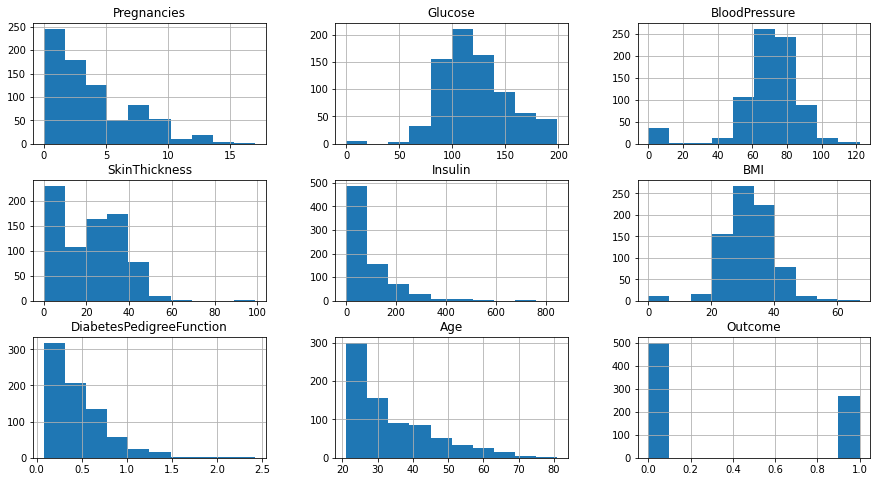

In [14]:
df.hist(figsize=(15,8))
plt.show()

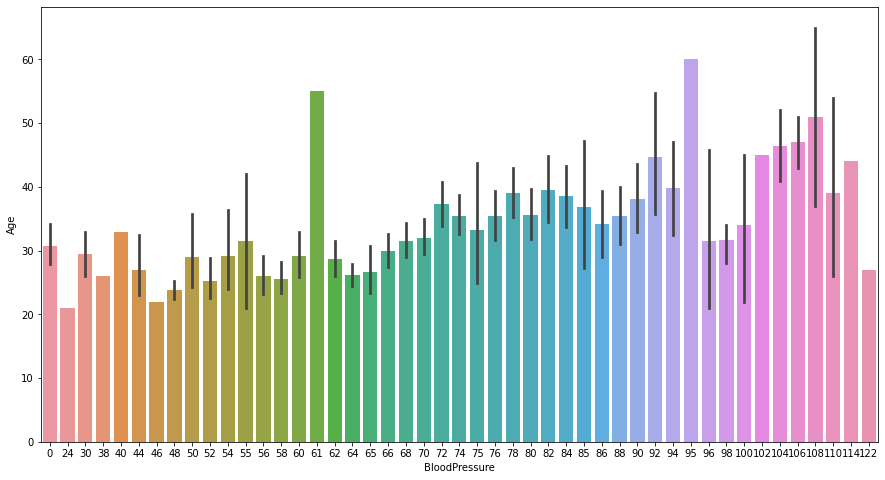

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(x='BloodPressure', y='Age', data=df)
plt.show()


In [16]:
'''plt.figure(figsize=(20,7))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness', data=df)
plt.show()'''

"plt.figure(figsize=(20,7))\nsns.set_style(style='whitegrid')\nplt.subplot(2,3,1)\nsns.boxplot(x='Glucose', data=df)\nplt.subplot(2,3,2)\nsns.boxplot(x='BloodPressure', data=df)\nplt.subplot(2,3,3)\nsns.boxplot(x='Insulin', data=df)\nplt.subplot(2,3,4)\nsns.boxplot(x='BMI', data=df)\nplt.subplot(2,3,5)\nsns.boxplot(x='Age', data=df)\nplt.subplot(2,3,6)\nsns.boxplot(x='SkinThickness', data=df)\nplt.show()"

In [17]:
'''plt.figure(figsize=(16,7))
data1=['Glucose','BloodPressure','Insulin','BMI','Age','SkinThickness']
sns.pairplot(df[data1], palette='Accent')
plt.show()'''

"plt.figure(figsize=(16,7))\ndata1=['Glucose','BloodPressure','Insulin','BMI','Age','SkinThickness']\nsns.pairplot(df[data1], palette='Accent')\nplt.show()"

In [18]:
'''sns.boxplot(x='Outcome',y='Insulin',data=df)'''

"sns.boxplot(x='Outcome',y='Insulin',data=df)"

In [19]:
#sns.regplot(x='BMI', y= 'Glucose', data=df)

In [20]:
#sns.relplot(x='BMI', y= 'Glucose', data=df)

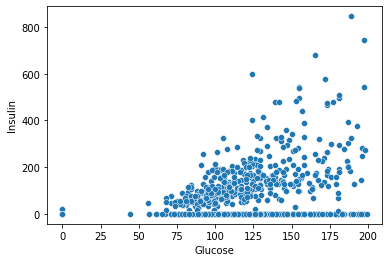

In [21]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=df)

In [22]:
#sns.pairplot(df,hue='Outcome')

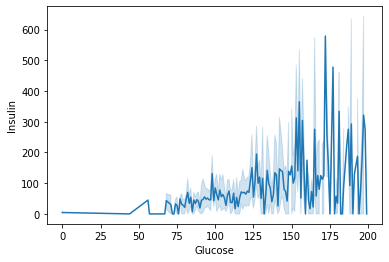

In [23]:
sns.lineplot(x='Glucose', y= 'Insulin', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; y

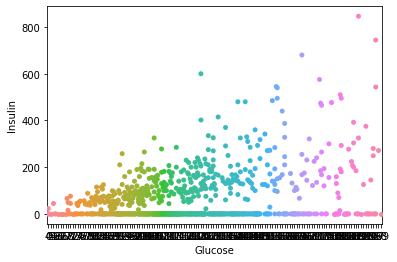

In [24]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=df)

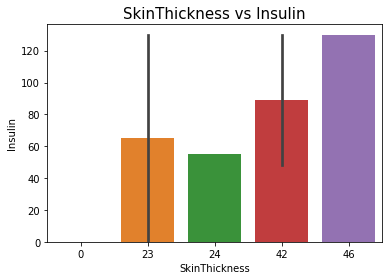

In [25]:
sns.barplot(x="SkinThickness", y="Insulin", data=df[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

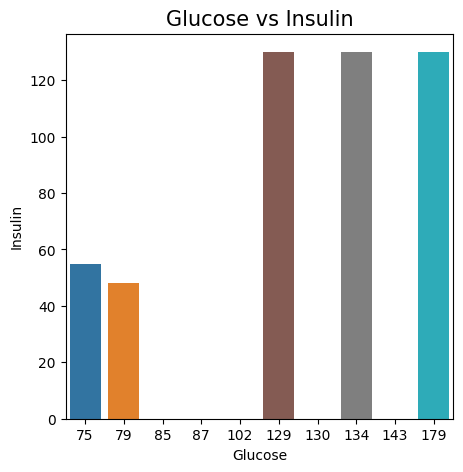

In [26]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=df[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

#Training and Testing the Data

In [27]:
#train_test_splitting of the dataset

x = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


#Models

###Logistic Regression

In [115]:
#LOGISTIC Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred_log=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 77.19869706840392
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [118]:
Logistic_r=accuracy_score(y_test,y_pred_log)*100


###KNeighbour Classifier

In [120]:
#Kneighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [121]:
y_pred_knn=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [122]:
Knn=accuracy_score(y_test,y_pred_knn)*100

###Support Vector Classifier

In [34]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
y_pred_svc=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [124]:
svm=accuracy_score(y_test,y_pred_svc)*100

###Naive Bayes Classifier

In [37]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [111]:
y_pred_nb=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 75.7328990228013
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [114]:
Naive_bayes=accuracy_score(y_test, y_pred_nb)*100
Naive_bayes

79.22077922077922

###Decision Tree Classiier

In [125]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [126]:
y_pred_dtc=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 82.08469055374593
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [127]:
dtc=accuracy_score(y_test,y_pred)*100

###Random Tree Classifier

In [43]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_pred_rtc=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154

Confusion Matrix:
 [[95 12]
 [16 31]]
Training Score:
 100.0
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


In [128]:
rtc=accuracy_score(y_test,y_pred)*100

###AdaBoost Classifier

In [129]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [130]:
y_pred_ab=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [131]:
ab=accuracy_score(y_test,y_pred_ab)*100

###Gradient Boosting Classifier

In [132]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [133]:
y_pred_gbc=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 91.85667752442997
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [134]:
gbc=accuracy_score(y_test,y_pred_gbc)*100

###XGB Classifier

In [135]:
#XGB Classifier
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[16:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [136]:
y_pred_xgb=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 86.31921824104235
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [137]:
xbg_accuracy=accuracy_score(y_test,y_pred)*100

###Extra Trees Classifier

In [138]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [139]:
y_pred_etc=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 100.0
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [140]:
etc=accuracy_score(y_test,y_pred)*100

In [58]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,0
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


##Model Record

In [145]:
data = {'Model Name':['Logistic Regression', 'KNeighbour Classifier', 'Support Vector Machine', 'Naive Bayes Classifier', 'Decision Tree Classifier','Random Tree Classifier','AdaBoost Classifier','Gradient Boosting Classifier', 'XGB Classifier','Extra Tree Classifier'],
        'Age':[Logistic_r, Knn, svm, Naive_bayes,dtc,rtc,ab,gbc, xbg_accuracy,etc]}
Model_record=pd.DataFrame(data)
Model_record

,Model Name,Age
0,Logistic Regression,82.467532
1,KNeighbour Classifier,75.974026
2,Support Vector Machine,79.220779
3,Naive Bayes Classifier,79.220779
4,Decision Tree Classifier,79.220779
5,Random Tree Classifier,79.220779
6,AdaBoost Classifier,77.922078
7,Gradient Boosting Classifier,81.168831
8,XGB Classifier,79.220779
9,Extra Tree Classifier,79.220779
